In [7]:
import numpy as np
import sympy as sym
from newton_solve import newton_solve

v7s = ['x', 'y', 'z']
fns = [
    'x ** 2 + y ** 2 + z ** 2 - 1',
    '2 * x ** 2 + y ** 2 - 4 * z',
    '3 * x ** 2 - 4 * y + z ** 2'
]

f = sym.Matrix(fns)
jacobian = f.jacobian(v7s)

# переводит выражения SymPy в функции Python
f = sym.lambdify(sym.symbols(v7s), f)
jacobian = sym.lambdify(sym.symbols(v7s), jacobian)

# Якобиан
# 2x 2y 2z
# 4x 2y -4
# 6x -4 2z

In [8]:
# По графикам нашел где примерно корни
start_approx_1 = np.array([0.5, 0.5, 0.5])
start_approx_2 = np.array([-0.5, 0.5, 0.5])

s1 = newton_solve(jacobian, f, start_approx_1)
s2 = newton_solve(jacobian, f, start_approx_2)

print(s1, s2)

[0.78519693 0.49661139 0.36992283] [-0.78519693  0.49661139  0.36992283]


### Система для решения
$$
\begin{cases}
y'' - y^3 = x^2, \\
0 \leq x \leq 1, \\
x = 0, y = 1, \\
x = 1, y = 3.
\end{cases}
$$

2.9362033420575124


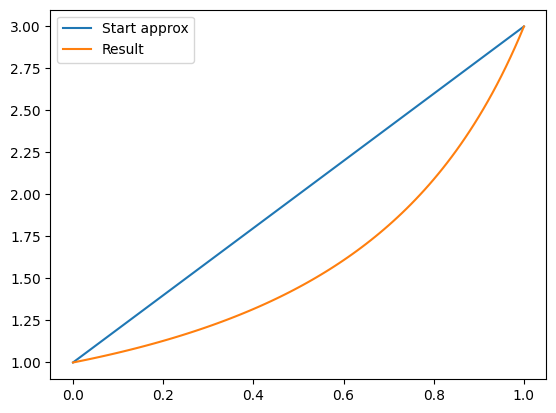

In [9]:
import matplotlib.pyplot as plt

n = 100
h = 1 / n

variables = [f'y{i}' for i in range(n + 1)]

x0, xn = 0, 1
y0, yn = 1, 3

x = np.linspace(x0, xn, n + 1, endpoint=True)

functions = [f'y0 - {y0}'] + [
    f'y{i - 1} - 2 * y{i} + y{i + 1} - {h} ** 2 * ({x[i]} ** 2 + y{i} ** 3)'
    for i in range(1, n)
] + [f'y{n} - {yn}']

f = sym.Matrix(functions)
jacobian = f.jacobian(variables)

# переводит выражения SymPy в функции Python
f = sym.lambdify(sym.symbols(variables), f)
jacobian = sym.lambdify(sym.symbols(variables), jacobian)


tan = (yn - y0) / (xn - x0)
start_approx = [y0 + tan * i * h for i in range(n + 1)]

s = newton_solve(jacobian, f, start_approx)

print(s)

plt.plot(x, start_approx, label="Start approx")
plt.plot(x, s, label="Result")
plt.legend()